In [1]:
import os
import sys
from pathlib import Path

%matplotlib inline

In [2]:
sys.path.append(r"../burntfields")
from rf_model import *

In [4]:
###For local visualization:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [3]:
#####STEP0_DATAPREP###########################################################################################
##############################################################################################################

In [9]:
##############################################################################################################
############### STEP0b_DATAPREP: Local commands to split training/non-training data sets:
#### This was used for original singular models. For bootstrapped models, see below.
data_dir = "../data"
model_dir = "../data/rf"
out_dir = "../out_local"  #Note: this is gitignored. Make this directory of change path.

############ set pixeldf (Full pixel-level dataframe with all variables for all fields):
##### Planet-only variables:
#pixeldf = os.path.join(data_dir,'V4_pixelData_Planet.csv')
##### Sentinel-only variables:
#pixeldf = os.path.join(data_dir,'V4_pixelData_Sentinel.csv')
##### Combined varaibles (selection, based on above models. or can create new combined set with mergePlanetSentinel() below)
pixeldf = os.path.join(data_dir,'V4_pixelData_COMBO.csv')
##### All variables with BASMA included:
#pixeldf = os.path.join(data_dir,'V4_pixelData_COMBOwBASMA.csv')

#############set field_list (List of labeled fields to include, with labels):
#field_list = os.path.join(data_dir,labels_2019_with_bbox_V4.csv')
field_list = os.path.join(data_dir,'labels_2019_with_bbox_V5.csv')
#train_no_train = label_training_pixels(field_list, pixeldf, out_dir, drop_border=True)

##############################################################################################################
############### STEP0c_DATAPREP: Local commands to sample 20% of training fields to use as holdout
##holdout_fields = generate_holdout(field_list, out_dir) # make sure to keep seed constant for replicability (or save output file and load this in future, as below):
### to use previous holdout set on file:
#holdout_fields = os.path.join(data_dir,'V2_Fields_HoldoutSet1.csv')
###    To run model without holdouts (this is a blank dataset with same column names to not alter code):
#holdout_fields = os.path.join(data_dir,'V2_Fields_HoldoutSet0.csv')
#pixel_path = os.path.join(data_dir,'pixelData_Labeled_V4_Planet.csv')

##############################################################################################################
###### STEP0d_DATAPREP: Local commands to split holdout fields from training set:
## if running STEP0b:
#training_path = train_no_train[0]
## if loading from previously saved data:
##For pixel-level analysis:
#training_path = os.path.join(data_dir,'FieldData_labeled_V2m2.csv')
## For field-level analysis:
#training_path = os.path.join(data_dir,FieldData_labeled_V2m2.csv')

#TrainHold = separate_holdout(holdout_fields, training_path, out_dir)

##############################################################################################################
####### STEP0e_DATAPREP: Local commands to prep test/train dataset for model:
###
######## set variable_path:
### PIXEL-LEVEL model:
###    COMBINED VARIABLES (PLANET + Sentinel):
#variable_path = 'os.path.join(model_dir,'V4_PixelLevel_variables_COMBO_refined49Final.csv')
###    PLANET-ONLY VARIABLES:
#variable_path = 'os.path.join(model_dir,'V4_PixelLevel_variables_Planet_refined32_final.csv')
###    SENTINEL-ONLY VARIABLES:
#variable_path = os.path.join(model_dir,'V4_PixelLevel_variables_Sentinel_refined25.csv')
### FIELD-LEVEL model:
###    os.path.join(model_dir,'V3_PixelLevel_variables_ALL.csv')
###    BASMA (plus COMBO) VARIABLES:
#variable_path =os.path.join(model_dir,'V4_PixelLevel_variables_COMBO_refined49wBASMA.csv')
### set training_on_path:
###  if running STEP0d:
#training_on_path = TrainHold[0]
#training_on_path = training_path
###  if loading from previously saved data:
###  PIXEL-LEVEL model:
###       COMBINED MODEL:
#training_on_path = os.path.join(data_dir,'pixelData_Labeled_COMBO_V4m1_toTrain.csv')
###       PLANET-ONLY:
#training_on_path = os.path.join(data_dir,'pixelData_Labeled_Planet_V4m1_toTrain.csv')
###       SENTINEL-ONLY:
#training_on_path = os.path.join(data_dir,'pixelData_Labeled_Sentinel_V4m1_toTrain.csv')
###  FIELD-LEVEL MODEL:
#training_on_path = os.path.join(data_dir,'2019_V2/FieldData_labeled_V2m2.csv')
###

### run command:
###     For default inbalanced dataset:
#train_prep = prep_train_data (training_on_path, variable_path)
###    For balanced dataset:
#train_prep = prep_train_data (training_on_path, variable_path, balanced=True, field_list=field_list)
### check result:
#train_prep[1].head(n=5)

####### STEP0f_DATAPREP: Local commands to get final test/train sets for model:
### if running step0e:
#train_features = train_prep[0]
#train_labels = train_prep[1]
#indices = train_prep[2]
### if loading from previously saved data:
# 
###
### run command:
#model_parts = get_test_train(train_features, train_labels, indices)

In [5]:
##### Local visualization. Do after STEP 0d, before removing labels from dataset.
#train_features = pd.read_csv(training_on_path)
#train_features.head(n=5)
#sns.pairplot(train_features, hue='labels')

In [6]:
#####STEP1_CREATE MODEL ######################################################################################
##############################################################################################################

In [2]:
##### Local commands to generate model. Need to have run STEP0f above.
x_train = model_parts[0]
y_train = model_parts[2]
rf_model = run_rf_model(x_train, y_train, 6888)

In [8]:
#####STEP2_CHECK MODEL #######################################################################################
##############################################################################################################

In [10]:
############# Local commands to check model. Need to have run STEPs 0f and 1 above.
###For singular models. See below for bootstrapped models. 
#### Get quick accuracy assesment for training pixels (biased for pixel-level!)
#x_test = model_parts[1]
#y_test = model_parts[3]
#accuracy = quick_accuracy(x_test, y_test, rf_model)

#### Get Variable importance for model:
#x_train = model_parts[0]
get_variable_importance(rf_model, x_train, out_dir)

#### Get model prediction scores:
#indices_train = model_parts[4]
#indices_test = model_parts[5]
#ids = train_prep[3]
#field_ids = train_prep[4]
#train_pred = get_predprob(train_features, indices_train, indices_test, train_labels, x_train, x_test, ids, field_ids)

#### Get best features (run iteratively until best accuracy is reached)
#select_best_features(train_features,train_labels,out_dir)

#### Graph ROC curve for diagnostics:
#burn_probs = holdout_fields_predicted['pred']
#burn_index = holdout_fields_predicted['label']
#print_roc_curve(burn_probs,burn_index)

#### Get holdout prediction scores:
## if running STEP0d:
#holdout_field_pix_path = train_hold[1]
## if loading from previously saved data:
#holdout_field_pix_path = os.path.join(data_dir,'pixelData_Labeled_COMBO_V4m1_Holdout.csv')
#holdout_field_pix_path = os.path.join(data_dir,'pixelData_Labeled_Planet_V4m1_Holdout.csv')
#holdout_field_pix_path = os.path.join(data_dir,'pixelData_Labeled_Sentinel_V4m1_Holdout.csv')

#holdout_pred = get_holdout_scores(holdout_field_pix_path, variable_path, rf_model, out_dir)
#holdout_pred = pd.read_csv(os.path.join(data_dir,'V4_LOOCV_Holdout_final.csv'))

hoacc = get_holdout_accuracy(holdout_pred)
#field_list = os.path.join(data_dir,'labels_2019_with_bbox_V2m3.csv')

                Gini-importance
blueAvg                0.013047
blueMax                0.016397
blueMin                0.013244
greenAvg               0.011302
greenMax               0.014036
...                         ...
BAS_CharMin            0.010429
BAS_CharStdv           0.018908
BAS_CharSpike0         0.011661
BAS_SSpike0            0.017381
BAS_SDrop0             0.018436

[61 rows x 1 columns]


NameError: name 'holdoutPred' is not defined

In [ ]:
####inspect fit of training data

##If train_pred is run above:
#train_features_predicted = train_pred
##else load prediction scores from file:
#train_features_predicted = os.path.join(model_dir,'V2_Model1_predictions_score.csv')
#sns.FacetGrid(train_features_predicted, hue="label", height=6).map(sns.kdeplot, "pred_train").add_legend()
#plt.show()

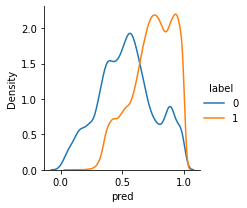

In [15]:
####inspect fit of holdout data

##If train_pred is run above:
holdout_fields_predicted = holdout_pred
##else load prediction scores from file:
#pd.read_csv(os.path.join(data_dir,'V2_Model1_testing_FieldHoldouts_.csv')
sns.FacetGrid(holdout_fields_predicted, hue="label", height=3).map(sns.kdeplot, "pred").add_legend()
plt.show()

In [5]:
###To Create combined Planet/Sentinel DataSet:
#planet_path = 'os.path.join(data_dir,'V4_pixelData_Planet.csv')
#sentinel_path = os.path.join(data_dir,'V4_pixelData_Sentinel.csv')
#use_Sentinel=['pixel_id','imgCount','MIRBISpike0','blueMax', 'nirDrop1', 'MIRBISpike0', 'MIRBI80', 'redEdge3Min', 
#             'BurnScarSpike0','BurnScarMax', 'BurnScarAvg', 'NBRAvg', 'red20', 'NBRDrop0', 'SWIR2Min', 'NBR2Min', 'SWIR2Avg', 
#             'NBR2Drop1', 'CIMin', 'MIRBIMax', 'CIDrop1', 'greenMax', 'SWIR1Min', 'blueAvg', 'SWIR2Drop1']
#merge_planet_sentinel(planet_path, sentinel_path, use_Sentinel, out_dir)

###To Create combined Planet/Sentinel/BASMA DataSet:
combo_path = os.path.join(data_dir,'V4_pixelData_COMBO.csv')
basma_path = os.path.join(data_dir,'V4_pixelData_BASMA.csv')
use_basma=['pixel_id','imgCount','blueAvg','blueMax', 'greenAvg', 'greenMax', 'redAvg', 'redMax', 'redSpike0','greenSpike0', 
             'greenDrop0','redMin', 'greenMin', 'blueStdv', 'greenStdv', 'redStdv']
merge_planet_basma(combo_path, basma_path, use_basma, out_dir)

final DF has 4908599 rows


In [ ]:
#####STEP3_FIT MODEL TO NONTRAINING DATA #####################################################################
##############################################################################################################

In [22]:
####Local settings for bootstrapped models:

out_dir = "../out_local"  #Note: this is gitignored. Make this directory of change path.
field_list = os.path.join(data_dir,'labels_2019_with_bbox_V4.csv')
#pixeldf = os.path.join(data_dir,'V4_pixelData_COMBO.csv')
pixeldf = os.path.join(data_dir,'V4_pixelData_COMBO.csv')
train_non_train = label_training_pixels(field_list, pixeldf, out_dir, drop_border=True)
training_path = train_non_train[0]

variable_path = os.path.join(data_dir,'V4_PixelLevel_variables_COMBO_refined49Final.csv')
###If using drop_border=False, use variable list with border included:
#variable_path = os.path.join(data_dir,'V4_PixelLevel_variables_COMBO_refined49Final_wBorder.csv')
## With BASMA:
#variable_path = os.path.join(data_dir,'V4_PixelLevel_variables_COMBOwBASMA_Final.csv')

#add_vars = os.path.join(model_dir,'VarsAdd.csv")
#rm_vars = os.path.join(model_dir,'VarsDrop.csv")
#switch_vars = os.path.join(model_dir,'SwitchVars.csv")

####For Finding best Model:
#acc = bootstrap_holdout(out_dir, field_list, training_path, variable_path, 1)
#avgacc = pd.DataFrame.mean(acc['OA'])
#print('Average accuracy is: {}'.format(avgacc))

#select_variables_with_bootstrap(variable_path, None, None, rm_vars, out_dir, field_list, training_path, 5)

####For getting predictions and accuracies once best model is found:
#feature_path = os.path.join(data_dir,'VarsDrop.csv"V4_pixelData_Sentinel.csv')
#pixeldf = os.path.join(data_dir,'V4_pixelData_COMBO.csv')
#variable_path = os.path.join(model_dir,'V4_PixelLevel_variables_COMBO_refined49Final.csv')
#split_csv_k(field_list, out_dir, 5, shuffle=True, strat='treatment', seed=8)
accO = bootstrap_holdout(out_dir, field_list, training_path, variable_path, 5, method='k', fit=True, all_features=pixeldf, seed1=8, seed2=6888, drop_border=True, strat='treatment')

4364978 pixels after dropping borders
4359473 pixes after dropping NAs


C:\Users\klobw\Desktop\PunjabBurning\Analysis\KW_code\burntfields\burntfields\burntfields\Rf_model.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TrainingPixels['set'] = 'TRAINING'
C:\Users\klobw\Desktop\PunjabBurning\Analysis\KW_code\burntfields\burntfields\burntfields\Rf_model.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NonTrainingPixels['set'] = 'NONTRAINING'


pixel dataset has 4908599 rows and 4896182 unique pixel IDs
pixel dataframe has 4896182 rows after dropping duplicates
4889244 pixes after dropping NAs
4348661 pixels after dropping borders
[               pixel_id  label
0        1100100131_100      0
1       1100100131_1001      0
2       1100100131_1002      0
3       1100100131_1003      0
4       1100100131_1004      0
...                 ...    ...
851646   6128100661_714      1
851647   6128100661_740      1
851648   6128100661_741      1
851649   6128100661_742      1
851650   6128100661_770      1

[851651 rows x 2 columns]]
shuffling fields
Working on strata: Control
125 fields in this strata. 25 fields in each fold with r 0.
Fold 0 has 0.0 extra fields
pulling rows between 0 and 24.0
Fold 1 has 0.0 extra fields
pulling rows between 25.0 and 49.0
Fold 2 has 0.0 extra fields
pulling rows between 50.0 and 74.0
Fold 3 has 0.0 extra fields
pulling rows between 75.0 and 99.0
Fold 4 has 0.0 extra fields
pulling rows between 100.0 a

C:\Users\klobw\Desktop\PunjabBurning\Analysis\KW_code\burntfields\burntfields\burntfields\Rf_model.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixels_holdouts['set']='HOLDOUT'
C:\Users\klobw\Desktop\PunjabBurning\Analysis\KW_code\burntfields\burntfields\burntfields\Rf_model.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixels_training['set']='TRAINING'


original training set had 853652 rows. Current training set has 673535 rows and holdout has 180117 rows.
There are 673535 training features
train features shape: (666799, 46)
train indices shape: (666799,)
test features shape: (6736, 46)
test indices shape: (6736,)
180117
0.7342560668898549
4348661 unique pixel ids for 4348661 rows in db
model has 49 variables
(4348661, 46)
(4348661, 46)


C:\Users\klobw\anaconda3\envs\planet_orders\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


working on fold 1...


C:\Users\klobw\Desktop\PunjabBurning\Analysis\KW_code\burntfields\burntfields\burntfields\Rf_model.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixels_holdouts['set']='HOLDOUT'
C:\Users\klobw\Desktop\PunjabBurning\Analysis\KW_code\burntfields\burntfields\burntfields\Rf_model.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixels_training['set']='TRAINING'


original training set had 853652 rows. Current training set has 688975 rows and holdout has 164677 rows.
There are 688975 training features
train features shape: (682085, 46)
train indices shape: (682085,)
test features shape: (6890, 46)
test indices shape: (6890,)
164677
0.6886268270614597
4348661 unique pixel ids for 4348661 rows in db
model has 49 variables
(4348661, 46)
(4348661, 46)


C:\Users\klobw\anaconda3\envs\planet_orders\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


working on fold 2...


C:\Users\klobw\Desktop\PunjabBurning\Analysis\KW_code\burntfields\burntfields\burntfields\Rf_model.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixels_holdouts['set']='HOLDOUT'
C:\Users\klobw\Desktop\PunjabBurning\Analysis\KW_code\burntfields\burntfields\burntfields\Rf_model.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixels_training['set']='TRAINING'


original training set had 853652 rows. Current training set has 684901 rows and holdout has 168751 rows.
There are 684901 training features
train features shape: (678051, 46)
train indices shape: (678051,)
test features shape: (6850, 46)
test indices shape: (6850,)
168751
0.8056841144645068
4348661 unique pixel ids for 4348661 rows in db
model has 49 variables
(4348661, 46)
(4348661, 46)


C:\Users\klobw\anaconda3\envs\planet_orders\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


working on fold 3...


C:\Users\klobw\Desktop\PunjabBurning\Analysis\KW_code\burntfields\burntfields\burntfields\Rf_model.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixels_holdouts['set']='HOLDOUT'
C:\Users\klobw\Desktop\PunjabBurning\Analysis\KW_code\burntfields\burntfields\burntfields\Rf_model.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixels_training['set']='TRAINING'


original training set had 853652 rows. Current training set has 674002 rows and holdout has 179650 rows.
There are 674002 training features
train features shape: (667261, 46)
train indices shape: (667261,)
test features shape: (6741, 46)
test indices shape: (6741,)
179650
0.7478931255218481
4348661 unique pixel ids for 4348661 rows in db
model has 49 variables
(4348661, 46)
(4348661, 46)


C:\Users\klobw\anaconda3\envs\planet_orders\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


working on fold 4...


C:\Users\klobw\Desktop\PunjabBurning\Analysis\KW_code\burntfields\burntfields\burntfields\Rf_model.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixels_holdouts['set']='HOLDOUT'
C:\Users\klobw\Desktop\PunjabBurning\Analysis\KW_code\burntfields\burntfields\burntfields\Rf_model.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixels_training['set']='TRAINING'


original training set had 853652 rows. Current training set has 698924 rows and holdout has 154728 rows.
There are 698924 training features
train features shape: (691934, 46)
train indices shape: (691934,)
test features shape: (6990, 46)
test indices shape: (6990,)
154728
0.8290871723282147
4348661 unique pixel ids for 4348661 rows in db
model has 49 variables
(4348661, 46)
(4348661, 46)


C:\Users\klobw\anaconda3\envs\planet_orders\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [1]:
### inspect fit
#sns.FacetGrid(nonPred, height=6).map(sns.kdeplot, "pred").add_legend()
#plt.show()

In [ ]:
#### Get all prediction scores (singular model without bootstrapping):

out_dir = "../out_local"  #Note: this is gitignored. Make this directory of change path.

### FEATURE_PATH:
##    field_level:
#feature_path = os.path.join(data_dir,'FieldData_V2.csv')
##    pixel_level (output from pixel_calcs.py):
#feature_path = os.path.join(data_dir,'V4_pixelData_Planet.csv')
feature_path = os.path.join(data_dir,'V4_pixelData_COMBO.csv')
#feature_path = os.path.join(data_dir,'V4_pixelData_Sentinel.csv')

### VARIABLE_PATH:
##    field_level:
#variable_path = os.path.join(data_dir,'V2_FieldLevel_Model1_variables_Refined30.csv')
##    pixel_level:
##        COMBO:
variable_path =os.path.join(model_dir,'V4_PixelLevel_variables_COMBO_refined49Final.csv')
##        PLANET:
#variable_path = os.path.join(model_dir,'V4_PixelLevel_variables_Planet_refined46.csv')
##        SENTINEL:
#variable_path = os.path.join(model_dir,'V4_PixelLevel_variables_Sentinel_refined28.csv')
### Main command:
non_pred = get_all_scores(feature_path, variable_path, rf_model, out_dir, print_db=True)

In [23]:
### CLEANING -- GET FINAL DATASET ########################################################################################

##################################################################################################################
### with simple holdout --  no k-fold, bootsrapping or LOOCV methods used:
##################################################################################################################
## For simple dataframe with only pixel_id, field_id & prediction
#simplify_dataset(non_pred, out_dir)

## with training flags and labels added:
#holdout_field_pix_path = pd.read_csv(os.path.join(out_dir,'V4_Model_testing_FieldLevel_Holdout_FullFieldx.csv'),index_col=[0])
#df_final = get_final_pixel_dataset(non_pred, training_on_path, holdout_field_pix_path, out_dir)

##################################################################################################################
### after bootstrapping methods were used:
##################################################################################################################
### If running directly after bootstrapHoldout:
#holdout_df = accO[1]
#full_df = accO[0]

### If loading from saved files:
#holdout_df = pd.read_csv(os.path.join(out_dir,'V4_HoldoutPred.csv'),index_col=[0])

#full_df = pd.read_csv(os.path.join(out_dir,'V4_predictions.csv'),index_col=[0])
#get_final_datasets_bootstrapped(holdout_df, full_df, out_dir)

##################################################################################################################
### after LOOCV methods were used:
##################################################################################################################
## run LOOCV on cluster with BASH script
## run consolidate_loocv.py on cluster with BASH script (note consolidate_loocv.py is not installed and should be loaded into folder with BASH script) )
## download holdoutDF and FullDF outputs
## run locally: get_final_datasets_loocv(holdout_df, full_df, labeled_list, out_dir)

final model has 3167 fields, 696 of which are training fields.


In [ ]:
########### Data checks ##################################################################################################
##########################################################################################################################

In [7]:
###Check dropped fields from pixel-level model:
def check_dropped(model, field_list, type='All'):
    if isinstance(model, pd.DataFrame):
        df = model
    else:
        df = pd.read_csv(model)
    
    if type=='Training':
        if 'training' in df:
            final_set = df[df['training']==1]
        else: final_set = df
    else: final_set = df
    
    if 'field_id' not in final_set:
        final_set['field_id'] = final_set['pixel_id'].str[:10]
        
    final_set.drop_duplicates('field_id', inplace=True)
    final_set['field_id'] = pd.to_numeric(final_set['field_id'])
    
    fields_kept = final_set['field_id'].to_list()
    fields_in = pd.read_csv(field_list)
    orig_fields = fields_in['unique_id'].to_list()
    
    print('original field list has {} fields, final dataset has {} fields'.format(len(orig_fields),len(fields_kept)) )
    fields_dropped = []
    for f in orig_fields:
        if f not in fields_kept:
            fields_dropped.append(f)
    print('Fields dropped: {}'.format(fields_dropped))
    
    return(fields_dropped)

In [10]:
check_dropped(pixeldf,field_list,type='ALL')

original field list has 682 fields, final dataset has 3209 fields
Fields dropped: [2114900921]


[2114900921]

In [4]:
def drop_training_woHO(model, ho_check):
    '''
    For k-fold models, Need to delete training fields that were not assigned a fold (due to lack of treatment arm info, etc.)
    Otherwise, they have near perfect predictions
    TODO, incorporate this into the holdout scripts rather than running ad-hoc.
    '''
    if isinstance(model, pd.DataFrame):
        DF = model
    else:
        DF = pd.read_csv(model)
        
    hos = pd.read_csv(ho_check)
    nulls = hos.loc[(hos['HO'].isnull())]
    not_used = nulls['unique_id'].to_list()
    print(not_used)
    clean_df = DF[~DF['field_id'].isin(not_used)]
    pd.DataFrame.to_csv(clean_df, os.path.join(out_dir,'V4_RF_PixelLevel_Predictions.csv'), sep=',', na_rep='NaN', index=True)

In [11]:
###Check balance on folds
def check_balance(model, field_list):
    df = pd.read_csv(model)
    final_train = df[df['training']==1]
    final_train.drop_duplicates('field_id', inplace=True)
    print(len(final_train))
    pd.DataFrame.to_csv(final_train, os.path.join(out_dir,'checkme.csv'), sep=',', na_rep='NaN', index=True)
    if 'kFold5' in model:
        final_train['HOGroup'] = final_train.apply(lambda x: 
                                                 0 if x['pred'] == x['0'] else
                                                 1 if x['pred'] == x['1'] else
                                                 2 if x['pred'] == x['2'] else
                                                 3 if x['pred'] == x['3'] else
                                                 4 if x['pred'] == x['4'] else
                                                 99, axis=1)
    elif 'kFold10' in model:
        final_train['HOGroup'] = final_train.apply(lambda x: 
                                                 0 if x['pred'] == x['0'] else
                                                 1 if x['pred'] == x['1'] else
                                                 2 if x['pred'] == x['2'] else
                                                 3 if x['pred'] == x['3'] else
                                                 4 if x['pred'] == x['4'] else
                                                 5 if x['pred'] == x['5'] else
                                                 6 if x['pred'] == x['6'] else
                                                 7 if x['pred'] == x['7'] else
                                                 8 if x['pred'] == x['8'] else
                                                 9 if x['pred'] == x['9'] else
                                                 99, axis=1)
    else:
        print('Check model name. Needs kFold5 or kFold10 in name to work here.')

    fields = pd.read_csv(field_list)
    final_train_set = final_train.merge(fields,how='left',left_on='field_id', right_on='unique_id')
    #Fields99 = 
    #print('these trining fields are not in a fold: {}'.format(fields99))
    balance_check = pd.crosstab(index=final_train_set["treatment"], columns=final_train_set["HOGroup"],margins=True) 
    return balance_check

In [5]:
out_dir = "../out_local"  #Note: this is gitignored. Make this directory of change path.
#final_model = os.path.join(out_dir,"V4m1_RF_PixelLevel_Predictions_COMBO_kFold5_Stratified.csv")
final_model = os.path.join(out_dir,"V4_LOOCV_predictionsLab.csv")
##For training fields:
field_list = os.path.join(data_dir,"labels_2019_with_bbox_V4.csv")
##For all fields:
#field_list = os.path.join(data_dir,"lon_lat_bbox_600m.csv")

#type = 'Training' for training fields only or 'All' for all fields (default)
check_dropped(final_model, field_list, type='All')

original field list has 705 fields, final dataset has 3209 fields
Fields dropped: [2114900921]


[2114900921]

In [25]:
ho_check = os.path.join(data_dir,"kfold","kfoldcheck.csv"
drop_training_wo_ho(final_model, ho_check)

[2115400141, 3102300701, 1108000531, 1129101071]


In [1]:
balance = check_balance(final_model, field_list)
print(balance)

In [4]:
####Check accuracy of full dataset (with Training and non combined, e.g. LOOCV output):
out_dir = "../out_local"  #Note: this is gitignored. Make this directory of change path.
final_model = pd.read_csv(os.path.join(out_dir,"V4m1_RF_PixelLevel_Predictions_COMBO_LOOCV.csv"))
field_list = os.path.join(data_dir,'labels_2019_spot_check_only.csv')

##Drop non-labeled pixels:
labeled_set = final_model[final_model.holdout == 1]
hoacc = get_holdout_accuracy(labeled_set)
print(hoacc)

0.7796869978757417
(0.7796869978757417, 642066, 178873, 35709, 117339)


In [4]:
####Local check to compare models
#old_model_path = os.path.join(data_dir,'V2_Model1_ALLpix_short.csv')
#checkpix = ['4118900321_49','4118900321_85','4118900321_150','1101401011_240','1101401011_470','1102300061_312', '1100100331_87']
#check_model_verions_pixLevel(checkpix, old_model_path, df_final)

In [ ]:
######################EXPERIMENTAL############################################################################
##############################################################################################################

In [ ]:
out_dir = "../out_local"  #Note: this is gitignored. Make this directory of change path.
allpix = os.path.join(data_dir,'V4_pixelData_Sentinel.csv')
#field_path = os.path.join(data_dir,'labels_2019_with_bbox_V2m3.csv')
#pixel_features = label_training_pixels(field_path, allpix, out_dir, drop_border=False)
#pixel_features_path = pixel_features[0]
#variable_path = os.path.join(data_dir,'V4_PixelLevel_variables_Sentinel_refined28.csv')
#get_single_pixels(pixel_features_path, field_path, 100, out_dir)